In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, train_test_split
%matplotlib inline

In [5]:
data = pd.read_csv("data/food.csv", delimiter="\t")

/Users/Jared/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (0,3,5,27,36) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
data.shape

(79470, 159)

In [7]:
data.columns

Index([u'code', u'url', u'creator', u'created_t', u'created_datetime',
       u'last_modified_t', u'last_modified_datetime', u'product_name',
       u'generic_name', u'quantity',
       ...
       u'caffeine_100g', u'taurine_100g', u'ph_100g',
       u'fruits-vegetables-nuts_100g', u'collagen-meat-protein-ratio_100g',
       u'cocoa_100g', u'chlorophyl_100g', u'carbon-footprint_100g',
       u'nutrition-score-fr_100g', u'nutrition-score-uk_100g'],
      dtype='object', length=159)

In [8]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000024600,http://world-en.openfoodfacts.org/product/0000...,date-limite-app,1434530704,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000027205,http://world-en.openfoodfacts.org/product/0000...,tacinte,1458238630,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000036252,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221701,2015-01-25T21:35:01Z,1422221855,2015-01-25T21:37:35Z,Lion Peanut x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000039259,http://world-en.openfoodfacts.org/product/0000...,tacinte,1422221773,2015-01-25T21:36:13Z,1422221926,2015-01-25T21:38:46Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000039529,http://world-en.openfoodfacts.org/product/0000...,teolemon,1420147051,2015-01-01T21:17:31Z,1439141740,2015-08-09T17:35:40Z,Pack de 2 Twix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pd.options.display.max_columns = 20

In [10]:
nullCounts = data.isnull().sum()

In [11]:
nullCounts

code                                   19
url                                    19
creator                                69
created_t                               3
created_datetime                        7
last_modified_t                         0
last_modified_datetime                  0
product_name                         7977
generic_name                        40925
quantity                            13388
packaging                           24114
packaging_tags                      24114
brands                              11286
brands_tags                         11290
categories                          21335
categories_tags                     21352
categories_en                       21334
origins                             62698
origins_tags                        62736
manufacturing_places                54667
manufacturing_places_tags           54674
labels                              50806
labels_tags                         50760
labels_en                         

In [12]:
nullRowData = data.isnull().sum(axis=1).sort_values()

In [13]:
nullRowData

15042     67
14922     71
66501     72
55360     73
48028     73
53681     74
14983     74
66481     74
38499     75
34738     75
66926     75
14984     75
34739     76
14899     76
39994     76
42306     77
34734     77
23435     77
39977     77
23406     77
66483     77
39273     77
39245     77
51908     78
15007     78
55379     78
66572     78
19401     78
23413     78
2417      79
        ... 
65766    150
65609    150
40717    150
56678    150
71854    150
6752     150
6663     150
6660     150
6659     150
6606     150
6611     150
6613     150
6621     150
6631     150
10419    150
6641     150
6642     150
6643     150
6644     150
6645     150
6646     150
6650     150
58907    150
6651     150
6652     150
6653     150
6657     150
6658     150
6604     150
6722     150
dtype: int64

In [14]:
nullRowDataIndexReset = nullRowData.reset_index(drop=True)

In [15]:
nullRowDataIndexReset

0         67
1         71
2         72
3         73
4         73
5         74
6         74
7         74
8         75
9         75
10        75
11        75
12        76
13        76
14        76
15        77
16        77
17        77
18        77
19        77
20        77
21        77
22        77
23        78
24        78
25        78
26        78
27        78
28        78
29        79
        ... 
79440    150
79441    150
79442    150
79443    150
79444    150
79445    150
79446    150
79447    150
79448    150
79449    150
79450    150
79451    150
79452    150
79453    150
79454    150
79455    150
79456    150
79457    150
79458    150
79459    150
79460    150
79461    150
79462    150
79463    150
79464    150
79465    150
79466    150
79467    150
79468    150
79469    150
dtype: int64

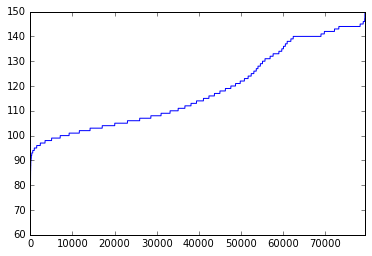

In [16]:
nullRowDataIndexReset.plot()

In [17]:
nullsPerRow = data.isnull().sum(axis=1)

In [18]:
nullsPerRow

0        133
1        144
2        140
3        140
4        139
5        120
6        123
7        135
8        119
9        119
10       141
11       107
12       107
13       140
14       109
15       110
16       111
17       109
18       122
19       144
20       124
21       116
22       134
23       144
24       144
25       113
26       113
27       128
28       136
29       136
        ... 
79440    144
79441    125
79442    144
79443    140
79444    139
79445    144
79446    133
79447    140
79448    144
79449    144
79450    146
79451    140
79452    144
79453    142
79454    143
79455    140
79456    140
79457    123
79458    128
79459    113
79460    123
79461    118
79462    140
79463    144
79464    120
79465    127
79466    110
79467    143
79468    126
79469    132
dtype: int64

In [19]:
dataMinusRows = data[nullsPerRow<120]

In [25]:
dataMinusRows.shape

(47586, 159)

In [26]:
nullColumnData = dataMinusRows.isnull().sum(axis=0)

In [27]:
print nullColumnData.shape
print nullColumnData[:15]

(159,)
code                          0
url                           0
creator                       1
created_t                     1
created_datetime              1
last_modified_t               0
last_modified_datetime        0
product_name                161
generic_name              12991
quantity                    712
packaging                  1504
packaging_tags             1504
brands                      299
brands_tags                 299
categories                  829
dtype: int64


In [28]:
nullColumnDataSorted = nullColumnData.sort_values()
print nullColumnDataSorted.shape
print nullColumnDataSorted

(159,)
code                                         0
url                                          0
last_modified_t                              0
last_modified_datetime                       0
states_tags                                  0
states                                       0
pnns_groups_2                                0
states_en                                    0
creator                                      1
created_t                                    1
created_datetime                             1
countries_tags                              25
countries_en                                25
countries                                   25
product_name                               161
brands                                     299
brands_tags                                299
quantity                                   712
image_url                                  788
image_small_url                            788
pnns_groups_1                              804
main_c

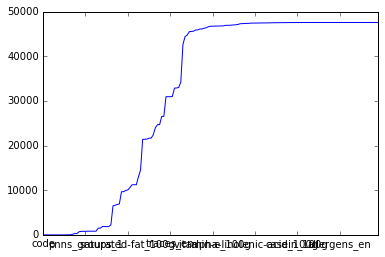

In [29]:
nullColumnDataSorted.plot()

In [30]:
dataMinusRowsAndColumns = dataMinusRows.T[nullColumnData <30000].T

In [31]:
dataMinusRowsAndColumns.shape

(47586, 58)

## Predict Countries that Food is produced in

First, look examine the countries field to get a sense for the data

In [65]:
dataMinusRowsAndColumns.countries

8                       France
9               United Kingdom
11                 Royaume-Uni
12              United Kingdom
14                      France
15              United Kingdom
16                      España
17                      France
21                      France
25                     Germany
26                     Germany
33                      France
49       France,United Kingdom
51                      France
55                      France
73                  États-Unis
74          Royaume-Uni,France
86                      France
90              United Kingdom
93               United States
111             United Kingdom
112             United Kingdom
114              United States
115             United Kingdom
117                     France
125              United States
126              United States
127                     France
132             United Kingdom
134                     France
                 ...          
79379              New Zealand
79381   

In [39]:
producedInMultipleCountries = np.sum(dataMinusRowsAndColumns.countries_en.str.contains(","))
producedInMultipleCountries

1351

In [47]:
producedInCountriesCount = dataMinusRowsAndColumns.countries_en.str.count(",")
sortedProducedInCountriesCount = producedInCountriesCount.sort_values().reset_index(drop=True)

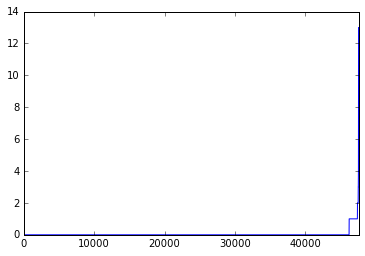

In [48]:
sortedProducedInCountriesCount.plot()

Some foods are produced in multiple countries. You can see in the graph above, that this is true for a small percentage of the data. For simplicity, we will remove these rows from our analysis.

In [62]:
producedInOneCountry = dataMinusRowsAndColumns.countries_en.str.contains(",") == False
print producedInOneCountry.shape
print producedInOneCountry.head()

(47586,)
8     True
9     True
11    True
12    True
14    True
Name: countries_en, dtype: bool


In [64]:
singleCountryData = dataMinusRowsAndColumns[producedInOneCountry]
print singleCountryData.shape

(46210, 58)


### Rocchio Method

In [80]:
#Show that all rows in the data have a value for the country
np.sum(singleCountryData.countries_en.isnull())

0

In [74]:
collist = singleCountryData.columns.tolist()
collist.remove('countries_en')
countriesRecords = singleCountryData[collist]
print countriesRecords.shape

(46210, 57)


In [68]:
countriesTarget = singleCountryData.countries
print countriesTarget.shape
print countriesTarget.head()

(46210,)
8             France
9     United Kingdom
11       Royaume-Uni
12    United Kingdom
14            France
Name: countries, dtype: object


In [75]:
x_train, x_test, y_train, y_test = train_test_split(countriesRecords, countriesTarget, test_size=0.2, random_state=33)

In [81]:
y_train.unique()

array(['France', 'Deutschland', 'Italia', 'Espa\xc3\xb1a', 'Switzerland',
       '\xc3\x96sterreich', 'Australia', 'United States', 'Belgique',
       'United Kingdom', 'Spain', 'Germany', 'Portugal',
       'S\xc3\xa9n\xc3\xa9gal', 'Regno Unito', 'Suisse', 'Italy',
       'La R\xc3\xa9union', 'South Africa', 'en:spain', 'Hong Kong',
       'Netherlands', 'Pays-Bas', 'Nederland', 'New Zealand', 'Tunisie',
       'Guadeloupe', 'Israel', 'Thailand', 'Brasil', 'Colombia', 'Cuba',
       'Romania', 'Indonesia', 'Belgium',
       '\xeb\x8c\x80\xed\x95\x9c\xeb\xaf\xbc\xea\xb5\xad', 'Danemark',
       'Poland', 'Luxembourg',
       '\xd0\xa0\xd0\xbe\xd1\x81\xd1\x81\xd0\xb8\xd1\x8f',
       "C\xc3\xb4te d'Ivoire", 'Saint-Pierre-et-Miquelon', 'Canada',
       'Cambodia', 'Royaume-Uni', 'United Arab Emirates', 'Czech Republic',
       'Rom\xc3\xa2nia', 'en:brazil', 'Polska', 'Allemagne', 'USA',
       'Slovenia', 'Lituanie', 'Qu\xc3\xa9bec', 'P\xc3\xa9rou', 'Mexico',
       'Italie', 'M\xc3\xa9x